In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [14]:
SHAPE = (137,236)

In [4]:
images = pd.read_parquet("./train_image_data_0.parquet")

In [5]:
labels = pd.read_csv("./train.csv")

In [6]:
labels_ = images.pop("image_id")

In [8]:
images = images.values

In [28]:
img = images[100].reshape(SHAPE)

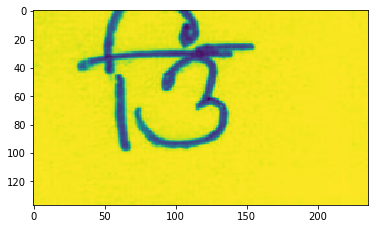

In [29]:
plt.imshow(img)

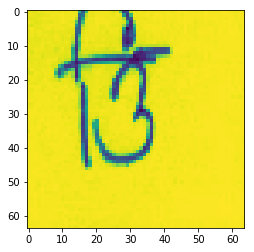

In [41]:
plt.imshow(cv2.resize(img.copy(),(64,64)))

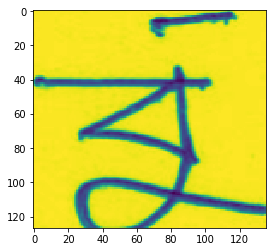

In [179]:
def crop(img,pad=True,sharpen=False):
    img_ = img.copy()
    H,W = img_.shape
    W_THRESH = 8
    H_THRESH = 8
    PAD = 5

    W_MIN,W_MAX = np.where(img.std(axis=0) > W_THRESH)[0][[0,-1]]
    H_MIN,H_MAX = np.where(img.std(axis=1) > H_THRESH)[0][[0,-1]]
    
    if pad:
        if W_MAX > W - W_THRESH:
            PAD_ = W_THRESH - PAD
        else:
            W_MAX += PAD
        
        if W_MIN < W_THRESH:
            pass
        else:
            pass
        
        if H_MAX > H - H_THRESH:
            pass
        else:
            pass
        
        if W_MIN < H - H_THRESH:
            pass
        else:
            pass

    return img_[H_MIN:H_MAX,W_MIN:W_MAX]


plt.imshow(crop(images[1003].reshape(SHAPE)))

In [175]:
img.shape

(137, 236)